## Trabajo No. 1
### Sobre: Algoritmos genéticos
#### Integrantes: Cristian Yepes Sanchez, Edison Escobar Posada

# Punto 1

$aptitud(x)=\begin{Bmatrix}
si (\sum x_{peso} \leqslant k) \Rightarrow  \sum x_{valor}
\\ 
sino \Rightarrow  0
\end{Bmatrix} $

## 1.1 Funcion de aptitud

In [2]:
import numpy as np

def funcion_aptitud(x, peso, valor, capacidad):

    if (np.sum(peso*x) <= capacidad):
        aptitud = np.sum(valor*x)
    else:
        aptitud = 0
    return aptitud

## 1.2 Parametros iniciales
Problema 1. <img src="images/problema1.1.1.png" />
Problema 2. <img src="images/problema1.1.2.png" />
Problema 3. <img src="images/problema1.1.3.png" />
Problema 4. <img src="images/problema1.1.4.png" />

In [166]:
#Problema 1
ni = 100 #numero de iteraciones
nc = 10 #tamaño de la poblacion
ng = 4 #numero de genes por cromosoma
pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

peso = [3, 5, 9, 5]
valor = [45, 30, 45, 10]
k = 16

In [134]:
#Problema 2
ni = 100 #numero de iteraciones
nc = 10 #tamaño de la poblacion
ng = 8 #numero de genes por cromosoma
pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

peso = [2, 20, 20, 30, 40, 30, 60, 10]
valor = [15, 100, 90, 60, 40, 15, 10, 1]
k = 102

In [3]:
#Problema 3
ni = 100 #numero de iteraciones
nc = 10 #tamaño de la poblacion
ng = 7 #numero de genes por cromosoma
pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

peso = [31, 10, 20, 19, 4, 3, 6]
valor = [70, 20, 39, 37, 7, 5, 10]
k = 50

In [140]:
#Problema 4
ni = 100 #numero de iteraciones
nc = 10 #tamaño de la poblacion
ng = 7 #numero de genes por cromosoma
pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

peso = [25, 35, 45, 5, 25, 3, 2, 2]
valor = [350, 400, 450, 20, 70, 8, 5, 5]
k = 104

## 1.3 Inicializacion de poblacion (p) y calculo de funcion de aptitud

In [167]:
#P es la poblacion inicial
p = np.round(np.random.random([nc, ng]))

#fa es el vector de la función de aptitud de cada uno de los individuos de poblacion
fa = np.zeros([nc], dtype=np.int)

for i in range(nc):
    fa[i] = funcion_aptitud(p[i], peso, valor, k)

    
print("Poblacion inicial... ")
print (p)
print("Aptitudes... ")
print (fa)

Poblacion inicial... 
[[1. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 1. 1.]]
Aptitudes... 
[ 0  0 75  0 40 55 55 45 75  0]


## 1.4. Ciclo principal del algoritmo genético:
**Seleccion->Cruce->Mutación->Evaluación->Inserción**

In [168]:
def seleccion_ruleta(numChilds):
    #Selección por medio de la ruleta
    probabilidades = np.zeros([nc], dtype=np.double)
    individuos = np.zeros([numChilds], dtype=np.int)
    for j in range (numChilds):
        for i in range(nc):
            probabilidades[i] = (float(fa[i])/np.sum(fa))
        
        #Calculemos el valor aleatorio de la ruleta
        numRandom = np.random.rand()
        #print("Numero Random (Ruleta): ", numRandom)
        #Calculemos las probabilidades acumuladas
        probabilidadesAcum = np.cumsum(probabilidades)
        
        #Seleccionemos un individuo segun el criterio explicado anteriormente
        individuos[j] = np.argmax(probabilidadesAcum >= numRandom)
        #print probabilidadesAcum[np.argmax(probabilidadesAcum >= numRandom)]
        #print("Individuo seleccionado: ", individuos)
    return individuos;

In [169]:
for i in range(ni):
    #Seleccion - Aleatoria    
    seleccionados = seleccion_ruleta(2)
    p1 = seleccionados[0]
    p2 = seleccionados[1]
    
    #Cruce a un punto
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = np.append(p[p1, 0:cross_point], p[p2, cross_point:])
        child2 = np.append(p[p2, 0:cross_point], p[p1, cross_point:])
        
    #Mutacion: se muta un bit aleatoriamente
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
        
        child1[mut_point_c1] = 1-child1[mut_point_c1]
        child2[mut_point_c2] = 1-child2[mut_point_c2]
    
    #Se evaluan los nuevos hijos
    eval_child1 = funcion_aptitud(child1, peso, valor, k)
    eval_child2 = funcion_aptitud(child2, peso, valor, k)
    
    #Insercion por reemplazo de los padres.
    if(eval_child1 > fa[p1]):
        p[p1] = child1
        fa[p1] = eval_child1
    
    if(eval_child2 > fa[p2]):
        p[p2] = child2
        fa[p2] = eval_child2

## 1.5. Mostrar mejor individuo al final del ciclo

In [171]:
print 'La mejor configuración para la bolsa es: ', p[np.argmax(fa)]
print 'Con una función de aptitud de: ', fa[np.argmax(fa)]

La mejor configuración para la bolsa es:  [1. 0. 1. 0.]
Con una función de aptitud de:  90


# Punto 2

<img src='images/viajero.png' />

## 2.1 Inicializar parámetros del algoritmo genético y gráfico de los puntos

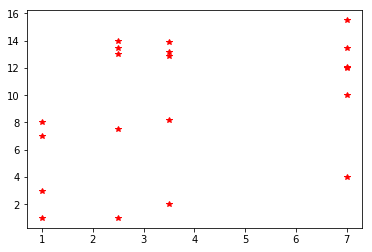

In [12]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

x=np.array([1, 1, 1, 1, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 7, 7, 7, 7, 7, 7]) #cities x coordinate
y=np.array([1, 3, 7, 8, 14, 13.5, 13, 7.5, 1, 2, 8.2, 12.9, 13.2, 13.9, 15.5, 13.5, 12.1, 12, 10, 4]) #cities y coordinate

ni = 1000 #numero de iteraciones
nc = 10 #numero de cromosomas
ng = 20 #numero de genes

pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

plt.plot(x, y, 'r*')#cities

## 2.2 Función de aptitud
Para este caso, la función de aptitud de un cromosoma $c$ se define el inverso de la sumatoria de las distancias entre ciudades consecutivas que representa. Por ejemplo, el cromosoma $c = [1, 2, 3]$  representa una ruta que recorre en orden $ciudad_1->ciudad_2->ciudad_3$.

En cuyo caso, la función de aptitud sería:

$\frac{1}{\sqrt{(ciudad_1[x]-ciudad_2[x])^2 + (ciudad_1[y]-ciudad_2[y])^2} + \sqrt{(ciudad_2[x]-ciudad_3[x])^2 + (ciudad_2[y]-ciudad_3[y])^2}}$ 

En términos generales, la función de aptitud se define como:
$aptitud(x) = \frac{1}{\sum{\sqrt{(ciudad_i[x]-ciudad_{i+1}[x])^2 + (ciudad_i[y]-ciudad_{i+1}[y])^2 }}}$

In [8]:
def funcion_aptitud(c, x, y):
    
    #cerremos el ciclo entre ciudades
    c = np.append(c,c[0])
       
    dist_sum = 0 #Esta variable almacenará la sumatoria de las distancias. Inicializar.
    
    for i in range(len(x)):
        #por cada ciudad i, tomar los valores x y y de las ciudades i y la ciuad i+1
        tx1 = x[c[i]]
        tx2 = x[c[i+1]]
        ty1 = y[c[i]]
        ty2 = y[c[i+1]]
        
        #Valor absoluto de la distancia entre dos 2 puntos adyacentes (ciudades)
        dist_sum += np.sqrt(abs( ((tx2-tx1)**2) + ((ty2-ty1)**2) ))
    
    return 1.0/dist_sum

## 2.3. Inicializar población (p) y calcular la aptitud (fa) de sus individuos

En este caso, la población inicial consiste en una matriz de enteros $p_{nc \times ng}$, con la restricción de que la secuencia de ciudades no puede tener repetición de ciudades. Por ello cada cromosoma es una permutación de ciudades.

In [16]:
fa = np.zeros([nc], dtype=np.float) #vector de aptitudes
p = np.zeros([nc, ng], dtype=np.int) #matriz de poblacion

for i in range(nc):
    #COMPLETAR: 2 lineas
    p[i, :] = np.random.permutation(ng) #permutacion
    fa[i] = funcion_aptitud(p[i, :], x, y) #funcion de aptitud
print p

[[ 3  9  4 12 11  8 15  2  5  0  6  7 17 16  1 18 14 10 13 19]
 [ 5  3 18  8  0  9 12  7 10  1  6  2 14 15 13 11  4 16 17 19]
 [ 1  6 16  7 18  5  9 15 19 14 17  2 12  0 13 11  3 10  8  4]
 [ 7  4  6  2  0  3  8 18 11 13 14  5 19  9 16 12 15 10 17  1]
 [15  2 11  7  4 18 13  6  5  1 10 19 16  3  8 14 12  0  9 17]
 [11 16 15 19  6 18 13  4 14  9  8  5 10  2  0  3 12 17  1  7]
 [15  3  9  0  1  2 10 12  4 14 13  8 16 11  5 19 17  7  6 18]
 [15 17 11 19  6  5 18  7 12  0 13 14 16  9  2  4 10  1  3  8]
 [15 13  8 11  6 19  1 16  0 14  5  9 10  4 12  3 17  2  7 18]
 [ 5  6  1  3 11 18 16  8 15 10  7 12 13  2 14  4  9 19 17  0]]


### 2.4. Ciclo principal del algoritmo genético:
**Seleccion->Cruce->Mutación->Evaluación->Inserción**

Analizar en clase el siguiente código y:

1. Evaluar la convergencia del algoritmo.
2. Medir el impacto de los parametros iniciales en la convergencia.
3. Implementar la etapa de inserción por reemplazo de los mejores de la población.

In [19]:
for i in range(ni):
    #Seleccion: Padre1 - el mejor de la población. Padre2 - aleatorio
    p1_index = np.argsort(fa)[::-1][0]
    p2_index = np.random.randint(nc)
    p1 = p[p1_index]
    p2 = p[p2_index]
    
    #Cruce: un punto
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = p1[0:cross_point]
        child2 = p2[0:cross_point]
        
        init_k = cross_point
        
        for k in range(ng):
            j = (init_k+k)%ng
            if not(np.count_nonzero(child1 == p2[j])):
                child1 = np.append(child1, p2[j])
            
            if not(np.count_nonzero(child2 == p1[j])):
                child2 = np.append(child2, p1[j])

    #Mutacion: cambio de orden
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
    
        temp = child1[mut_point_c1]
        child1[mut_point_c1] = child1[mut_point_c2]
        child1[mut_point_c2] = temp
        
        temp = child2[mut_point_c1]
        child2[mut_point_c1] = child2[mut_point_c2]
        child2[mut_point_c2] = temp
    
    #Evaluacion de los hijos
    eval_child1 = funcion_aptitud(child1, x, y)
    eval_child2 = funcion_aptitud(child2, x, y)
    
    #Inserción: reemplazo de padres
    if(eval_child1 > fa[p1_index]):
        p[p1_index] = child1
        fa[p1_index] = eval_child1
    
    if(eval_child2 > fa[p2_index]):
        p[p2_index] = child2
        fa[p2_index] = eval_child2
    

## 2.5. Mostrar mejor individuo al final del ciclo

In [20]:
print 'La mejor ruta es: ', p[np.argmax(fa)]
print 'Con una función de aptitud de: ', fa[np.argmax(fa)]

La mejor ruta es:  [19  9  8  0  1  2 18 17 16 15 14 13 12  4  5  6 11  3  7 10]
Con una función de aptitud de:  0.0213869829552641


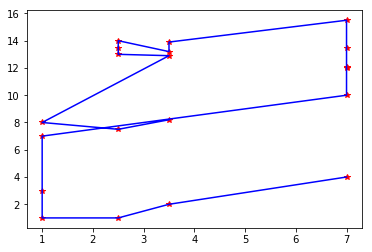

In [21]:
'''
plot solution
'''
best_path = p[np.argmax(fa)]
plt.plot(x, y, 'r*')#paths
plt.plot(x[best_path], y[best_path], 'b')#paths
plt.show() 